## Question: Housing Analysis

* How has the trendline during COVID differ from a full housing market cycle in select cities? 
    * Trend lines month over month for each city 
    * Make sure Atlanta is one of the cities we analyze. 
* How has the rate of housing price change changed between the two periods (2018-2019) and (2019-2020)? 
* Has it accelerated in COVID times? “Acceleration factor”. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import warnings
warnings.filterwarnings("ignore")

In [4]:
#reading csvs from cleaned data set
cleaned_pop_df = pd.read_csv("../CleanedData/cleaned_population.csv")
cleaned_rental_df = pd.read_csv("../CleanedData/cleaned_rental.csv")


#data set with changing rates
population_df = pd.read_csv("../PopRelated/sorted_population_final.csv")
rental_df = pd.read_csv("rental_rate.csv")
housing_df = pd.read_csv("housing_rate.csv")

#all house price csv 
house_df = pd.read_csv("../RawData/HomePriceFull.csv")

In [5]:
#renaming the values and columns names in the dataframe
house_df = house_df.rename(columns={"RegionName":"City"})
# house_df.drop(house_df.iloc[:, 5:269], inplace = True, axis = 1) 
# house_df.drop(house_df.iloc[:, 0:2], inplace = True, axis = 1) 
# del house_df["RegionType"]
# house_df['City'] = house_df['City'].str.split(',').str[0]
# house_df = house_df.replace({"Los Angeles-Long Beach-Anaheim": "Los Angeles",
#                                 "Dallas-Fort Worth":"Dallas",
#                                  "Miami-Fort Lauderdale":"Miami",
#                                  "Minneapolis-St Paul" : "Minneapolis",
#                                  "Louisville-Jefferson County":"Louisville"})

In [6]:
#finding the picked cities from the dataframe
df1 = house_df.loc[(house_df["City"]=="Boston") & (house_df["State"]=="MA")]
df2 = house_df.loc[house_df["City"]=="Salt Lake City"]
df3 = house_df.loc[(house_df["City"]=="Minneapolis") & (house_df["State"]=="MN")]
df4 = house_df.loc[house_df["City"]=="Seattle"]
df5 = house_df.loc[(house_df["City"]=="Miami") & (house_df["State"]=="FL")]
df6 = house_df.loc[(house_df["City"]=="Atlanta") & (house_df["State"]=="GA")]
df7 = house_df.loc[(house_df["City"]=="Columbus") & (house_df["State"]=="OH")]
df8 = house_df.loc[(house_df["City"]=="Columbus") & (house_df["State"]=="GA")]
df9 = house_df.loc[(house_df["City"]=="Fayetteville") & (house_df["State"]=="NC")]
df10 = house_df.loc[(house_df["City"]=="Louisville") & (house_df["State"]=="KY")]
df11 = house_df.loc[(house_df["City"]=="Portland") & (house_df["State"]=="OR")]
df12 = house_df.loc[(house_df["City"]=="San Jose") & (house_df["State"]=="CA")]
df13 = house_df.loc[house_df["City"]=="New York"]
df14 = house_df.loc[house_df["City"]=="Oklahoma City"]
df15 = house_df.loc[(house_df["City"]=="Denver") & (house_df["State"]=="CO")]
df16 = house_df.loc[(house_df["City"]=="Kansas City") & (house_df["State"]=="KS")]
df17 = house_df.loc[(house_df["City"]=="Frisco") & (house_df["State"]=="TX")]
df18 = house_df.loc[(house_df["City"]=="Irvine") & (house_df["State"]=="CA")]
df19 = house_df.loc[house_df["City"]=="Honolulu"]
df20 = house_df.loc[(house_df["City"]=="Des Moines") & (house_df["State"]=="IA")]

#combining the found data into a dateframe
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19,df20]
result_df = pd.concat(frames).reset_index(drop=True)
result_df

,RegionID,SizeRank,City,RegionType,StateName,State,Metro,CountyName,1/31/96,2/29/96,...,12/31/19,1/31/20,2/29/20,3/31/20,4/30/20,5/31/20,6/30/20,7/31/20,8/31/20,9/30/20
0,44269,26,Boston,City,MA,MA,Boston-Cambridge-Newton,Suffolk County,145126.0,144891.0,...,637140,638427,641871,644810,645775,645083,644869,647531,652808,659598
1,6909,150,Salt Lake City,City,UT,UT,Salt Lake City,Salt Lake County,171786.0,172028.0,...,413503,415883,417737,420016,422598,426332,429880,433189,436479,440150
2,5983,47,Minneapolis,City,MN,MN,Minneapolis-St. Paul-Bloomington,Hennepin County,88345.0,88052.0,...,285724,286744,287556,288670,290196,292148,294256,296615,299085,301333
3,16037,24,Seattle,City,WA,WA,Seattle-Tacoma-Bellevue,King County,171700.0,171851.0,...,716873,721847,725892,730218,735381,739211,745142,752713,763100,773508
4,12700,39,Miami,City,FL,FL,Miami-Fort Lauderdale-West Palm Beach,Miami-Dade County,117822.0,118015.0,...,354688,354726,356312,357509,358505,359201,359924,361230,363192,365676
5,37211,40,Atlanta,City,GA,GA,Atlanta-Sandy Springs-Roswell,Fulton County,113460.0,113758.0,...,285868,287245,289023,290562,291463,291311,292152,293351,295266,296590
6,10920,18,Columbus,City,OH,OH,Columbus,Franklin County,92070.0,92187.0,...,167254,168904,170573,171875,173030,173885,175032,176507,178527,180611
7,17539,170,Columbus,City,GA,GA,Columbus,Muscogee County,NaN,NaN,...,106093,106746,107323,107874,108403,109352,110201,111002,111448,112209
8,52001,104,Fayetteville,City,NC,NC,Fayetteville,Cumberland County,94464.0,94687.0,...,125904,126743,127196,127750,128167,128953,129956,131121,132467,133923
9,12455,19,Louisville,City,KY,KY,Louisville/Jefferson County,Jefferson County,88703.0,88984.0,...,176334,177435,178321,179348,180509,181415,182286,183450,185259,187166


<IPython.core.display.Javascript object>


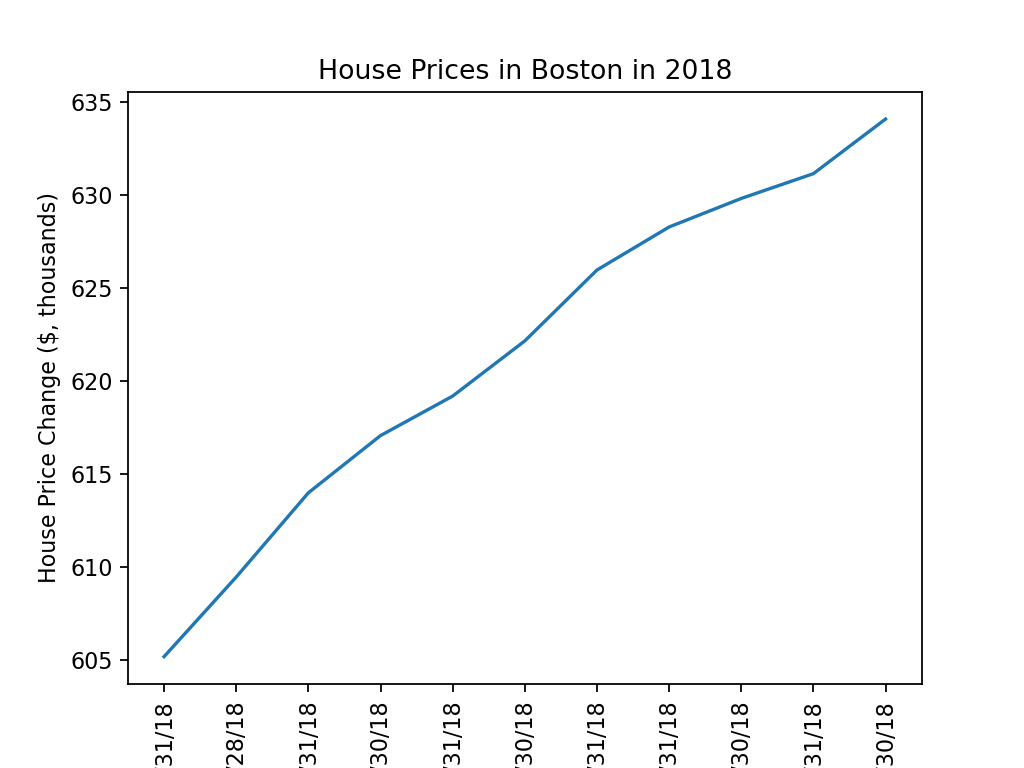

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

In [7]:
#Look at cycles in select cities 
Boston2018 = result_df.iloc[0,272:283]
Boston2018 = Boston2018/1000
%matplotlib notebook
plt.plot(Boston2018, label="Boston2018")
plt.title("House Prices in Boston in 2018")
plt.xlabel("Months")
plt.ylabel("House Price Change ($, thousands)")
plt.xticks(rotation = 'vertical')


<IPython.core.display.Javascript object>


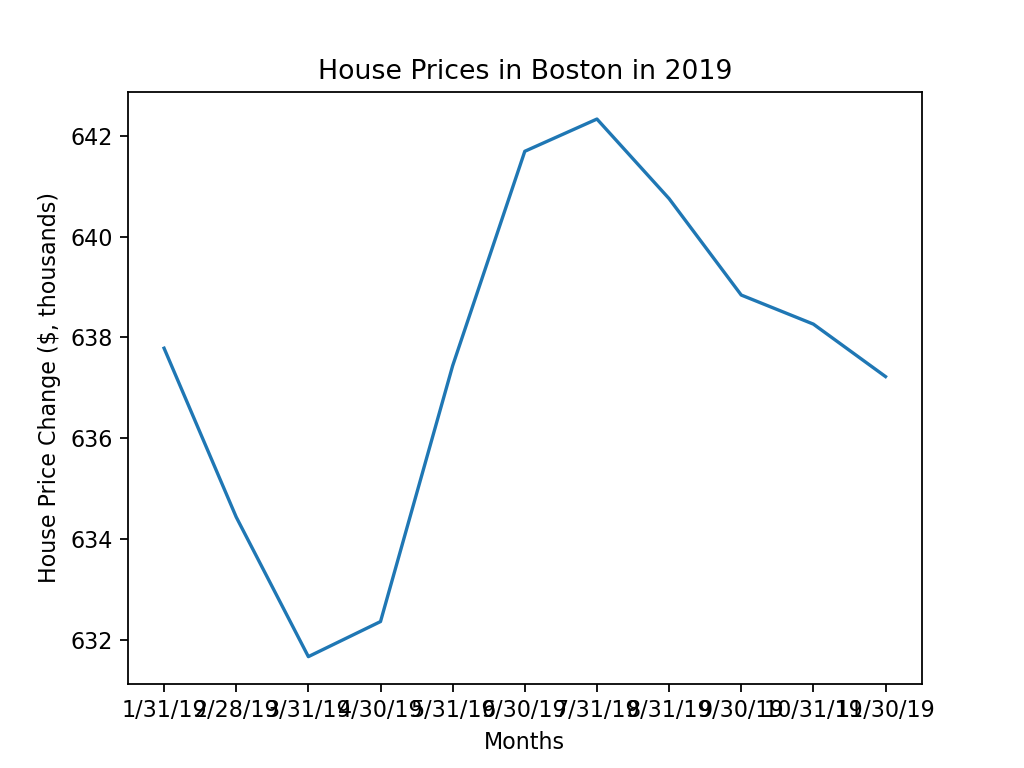

Text(0, 0.5, 'House Price Change ($, thousands)')

In [8]:
Boston2019 = result_df.iloc[0,284:295]
Boston2019 = Boston2019/1000
%matplotlib notebook
plt.plot(Boston2019, label="Boston2019")
plt.title("House Prices in Boston in 2019")
plt.xlabel("Months")
plt.ylabel("House Price Change ($, thousands)")
# plt.xticks(rotation = 'vertical')

<IPython.core.display.Javascript object>


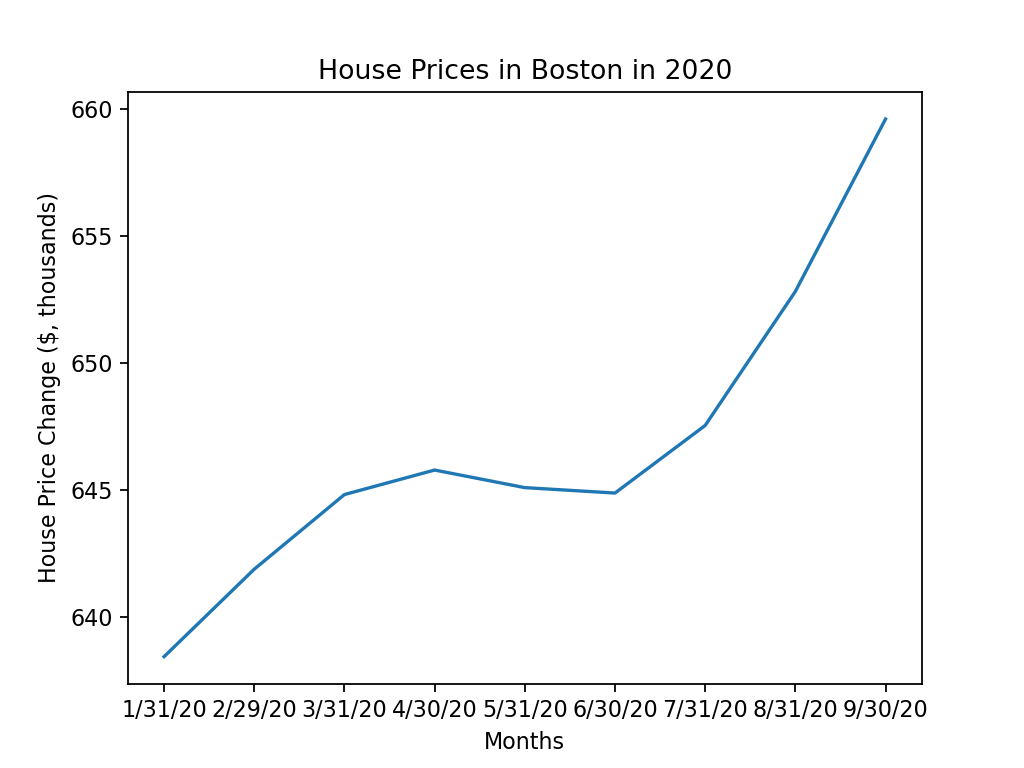

In [9]:
Boston2020 = result_df.iloc[0,296:]
Boston2020 = Boston2020/1000
%matplotlib notebook
plt.plot(Boston2020, label="Boston2020")
plt.title("House Prices in Boston in 2020")
plt.xlabel("Months")
plt.ylabel("House Price Change ($, thousands)")

# plt.xticks(rotation = 'vertical')
plt.show()

<IPython.core.display.Javascript object>


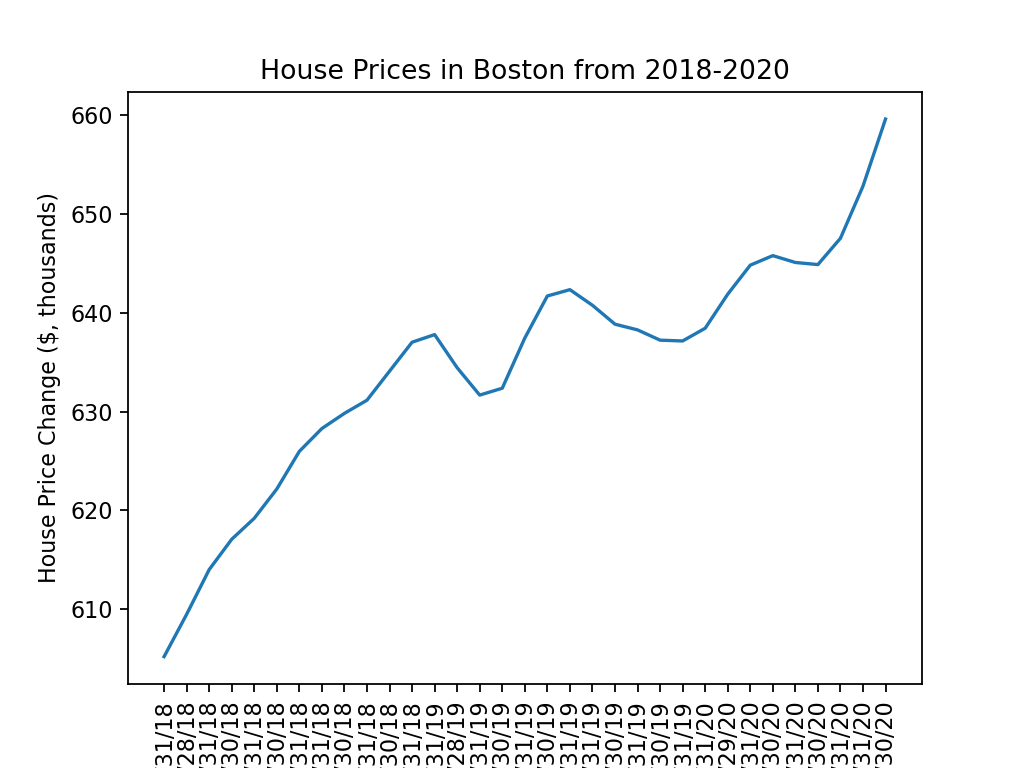

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 <a list of 33 Text major ticklabel objects>)

In [10]:
Boston = result_df.iloc[0,272:]
Boston = Boston/1000
%matplotlib notebook
plt.plot(Boston, label="Boston")
plt.title("House Prices in Boston from 2018-2020")
plt.xlabel("Months")
plt.ylabel("House Price Change ($, thousands)")
plt.xticks(rotation = 'vertical')

<IPython.core.display.Javascript object>


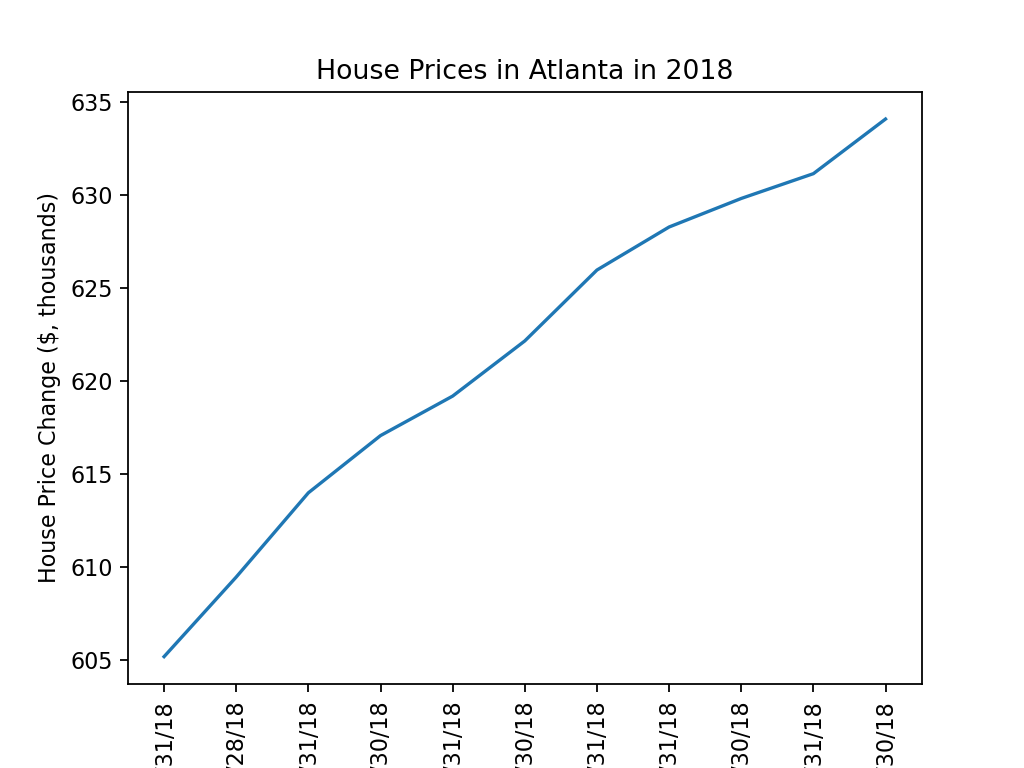

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 <a list of 11 Text major ticklabel objects>)

In [27]:
#Look at cycles in select cities 
Atlanta2018 = result_df.iloc[5,272:284]
Atlanta2018 = Atlanta2018/1000
%matplotlib notebook
plt.plot(Boston2018, label="Atlanta 2018")
plt.title("House Prices in Atlanta in 2018")
plt.xlabel("Months")
plt.ylabel("House Price Change ($, thousands)")
plt.xticks(rotation = 'vertical')

<IPython.core.display.Javascript object>


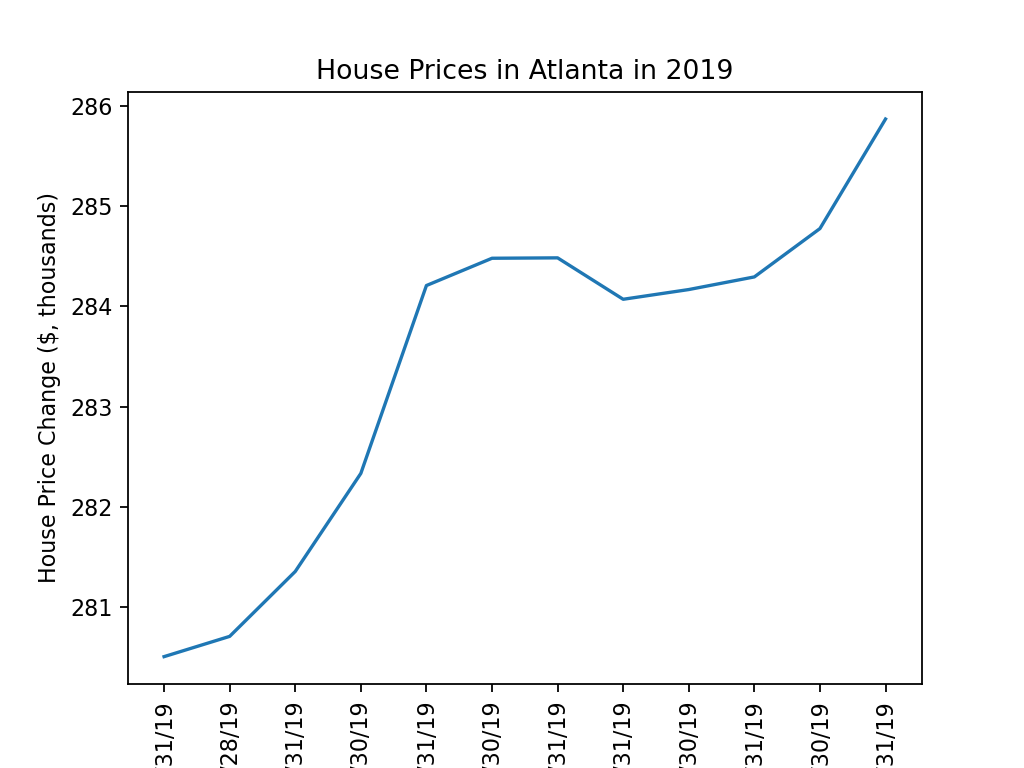

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

In [26]:
Atlanta2019 = result_df.iloc[5,284:296]
Atlanta2019 = Atlanta2019/1000
%matplotlib notebook
plt.plot(Atlanta2019, label="Atlanta2019")
plt.title("House Prices in Atlanta in 2019")
plt.xlabel("Months")
plt.ylabel("House Price Change ($, thousands)")
plt.xticks(rotation = 'vertical')

<IPython.core.display.Javascript object>


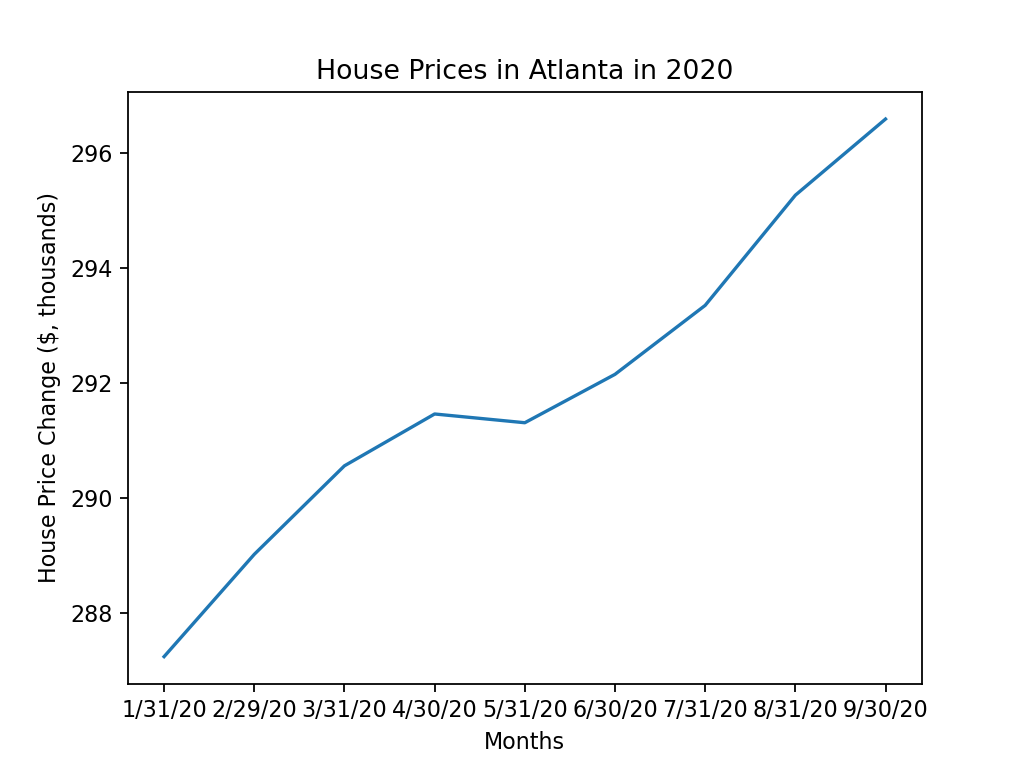

In [13]:
Atlanta2020 = result_df.iloc[5,296:]
Atlanta2020 = Atlanta2020/1000
%matplotlib notebook
plt.plot(Atlanta2020, label="Atlanta2020")
plt.title("House Prices in Atlanta in 2020")
plt.xlabel("Months")
plt.ylabel("House Price Change ($, thousands)")

# plt.xticks(rotation = 'vertical')
plt.show()

<IPython.core.display.Javascript object>


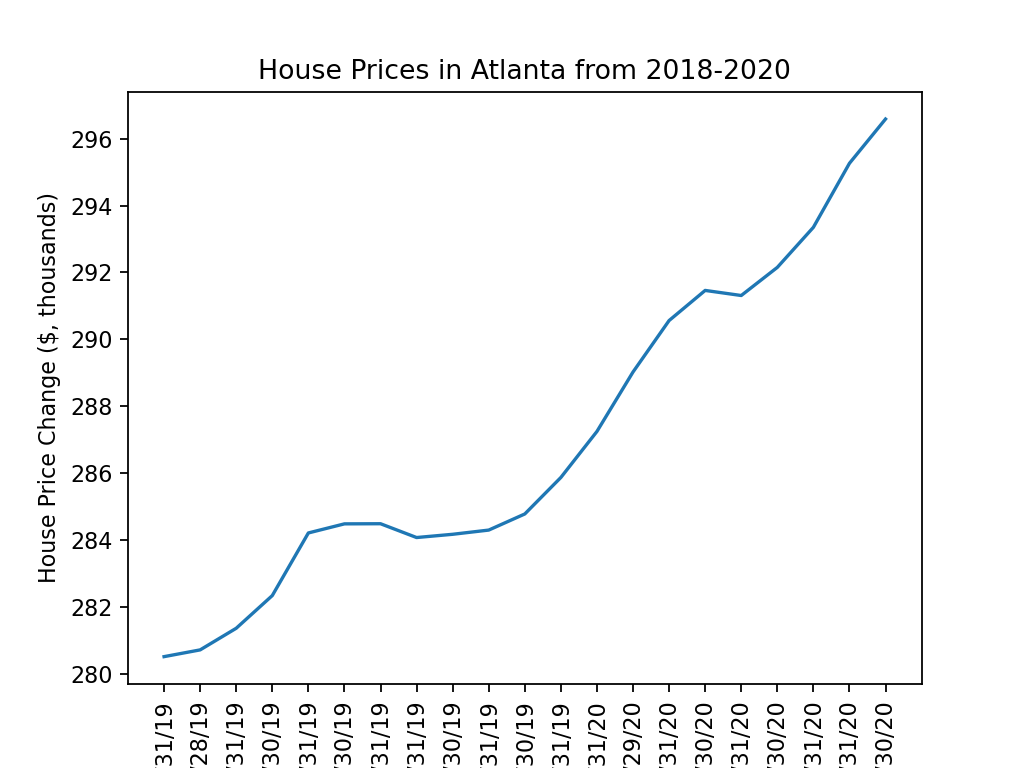

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
 <a list of 21 Text major ticklabel objects>)

In [14]:
Atlanta = result_df.iloc[5,284:]
Atlanta = Atlanta/1000
%matplotlib notebook
plt.plot(Atlanta, label="Atlanta")
plt.title("House Prices in Atlanta from 2018-2020")
plt.xlabel("Months")
plt.ylabel("House Price Change ($, thousands)")
plt.xticks(rotation = 'vertical')

In [16]:
# selecting house price data from 2019 to 2020 for each city
Boston = result_df.iloc[0, 284:]
Salt_Lake_City = result_df.iloc[1, 284:]
Minneapolis = result_df.iloc[2, 284:]
Seattle = result_df.iloc[3, 284:]
Miami = result_df.iloc[4, 284:]
Atlanta = result_df.iloc[5, 284:]
ColumbusOH = result_df.iloc[6, 284:]
ColumbusGA = result_df.iloc[7, 284:]
FayettevilleNC = result_df.iloc[8, 284:]
Louisville = result_df.iloc[9, 284:]
PortlandOR = result_df.iloc[10, 284:]
SanJose = result_df.iloc[11, 284:]
NewYork = result_df.iloc[12, 284:]
OklahomaCity = result_df.iloc[13, 284:]
Denver = result_df.iloc[14, 284:]
KansasCity = result_df.iloc[15, 284:]
Frisco = result_df.iloc[16, 284:]
Irvine = result_df.iloc[17, 284:]
Honolulu = result_df.iloc[18, 284:]
DesMoines = result_df.iloc[19, 284:]



<IPython.core.display.Javascript object>


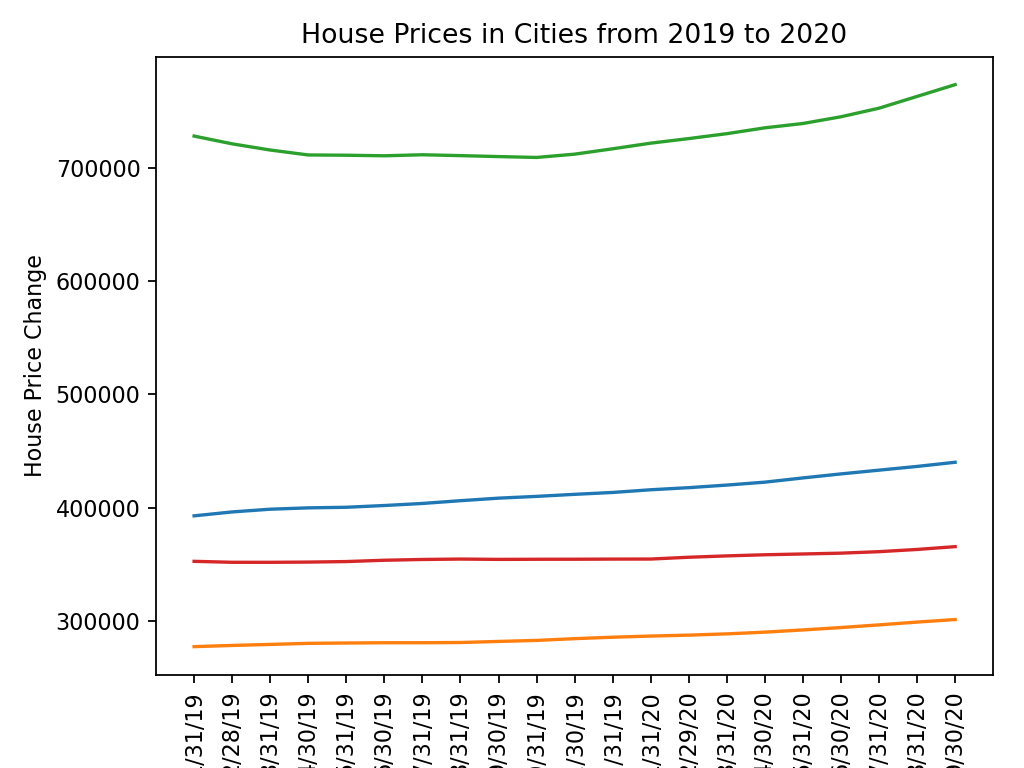

In [17]:
#plotting the house price of each city from 2019 to 2020
%matplotlib notebook
# plt.plot(Boston, label="Boston")
plt.plot(Salt_Lake_City, label="Salt Lake City")
plt.plot(Minneapolis, label="Minneapolis")
plt.plot(Seattle, label="Seattle")
plt.plot(Miami, label="Miami")
# plt.plot(Atlanta, label="Atlanta")
# plt.plot(ColumbusOH, label="Columbus,OH")
# plt.plot(ColumbusGA, label="Columbus,GA")
# plt.plot(FayettevilleNC, label="Fayetteville,NC")
# plt.plot(Louisville, label="Louisville")
# plt.plot(PortlandOR, label="Portland,OR")
# plt.plot(SanJose, label="SanJose")
# plt.plot(NewYork, label="New York")
# plt.plot(OklahomaCity, label="Oklahoma City")
# plt.plot(Denver, label="Denver")
# plt.plot(KansasCity, label="KansasCity")
# plt.plot(Frisco, label ="Frisco")
# plt.plot(Irvine, label ="Irvine")
# plt.plot(Honolulu, label ="Honolulu")
# plt.plot(DesMoines, label="DesMoines")

plt.title("House Prices in Cities from 2019 to 2020")
plt.xlabel("Months")
plt.ylabel("House Price Change")
plt.tight_layout()
plt.xticks(rotation = 'vertical')
plt.show()

In [19]:
#selecting house price data from 2018 to 2020 for each city
Boston = result_df.iloc[0, 272:]
Salt_Lake_City = result_df.iloc[1, 272:]
Minneapolis = result_df.iloc[2, 272:]
Seattle = result_df.iloc[3, 272:]
Miami = result_df.iloc[4, 272:]
Atlanta = result_df.iloc[5, 272:]
ColumbusOH = result_df.iloc[6, 272:]
ColumbusGA = result_df.iloc[7, 272:]
FayettevilleNC = result_df.iloc[8, 272:]
Louisville = result_df.iloc[9, 272:]
PortlandOR = result_df.iloc[10, 272:]
SanJose = result_df.iloc[11, 272:]
NewYork = result_df.iloc[12, 272:]
OklahomaCity = result_df.iloc[13, 272:]
Denver = result_df.iloc[14, 272:]
KansasCity = result_df.iloc[15, 272:]

<IPython.core.display.Javascript object>


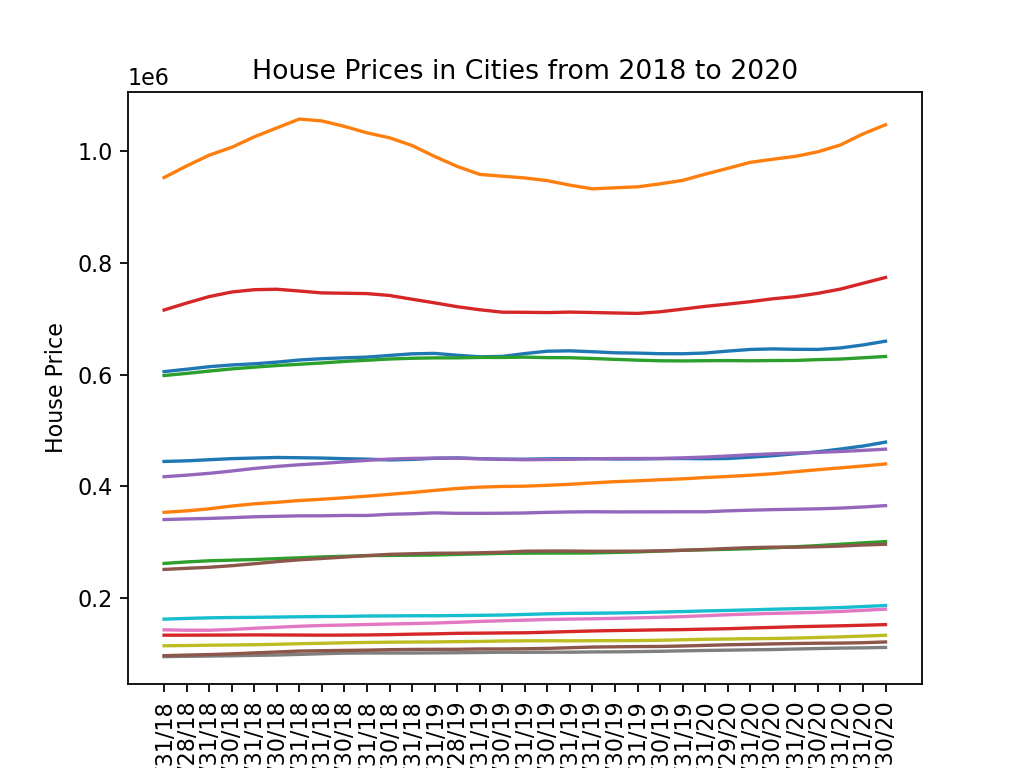

In [20]:
#plotting the house price of each city from 2019 to 2020
%matplotlib notebook
plt.plot(Boston, label="Boston")
plt.plot(Salt_Lake_City, label="Salt Lake City")
plt.plot(Minneapolis, label="Minneapolis")
plt.plot(Seattle, label="Seattle")
plt.plot(Miami, label="Miami")
plt.plot(Atlanta, label="Atlanta")
plt.plot(ColumbusOH, label="Columbus,OH")
plt.plot(ColumbusGA, label="Columbus,GA")
plt.plot(FayettevilleNC, label="Fayetteville,NC")
plt.plot(Louisville, label="Louisville")
plt.plot(PortlandOR, label="Portland,OR")
plt.plot(SanJose, label="SanJose")
plt.plot(NewYork, label="New York")
plt.plot(OklahomaCity, label="Oklahoma City")
plt.plot(Denver, label="Denver")
plt.plot(KansasCity, label="KansasCity")

plt.title("House Prices in Cities from 2018 to 2020")
plt.xlabel("Months")
plt.ylabel("House Price")
plt.xticks(rotation = 'vertical')
plt.show()

In [22]:
result_df.columns

Index(['RegionID', 'SizeRank', 'City', 'RegionType', 'StateName', 'State',
       'Metro', 'CountyName', '1/31/96', '2/29/96',
       ...
       '12/31/19', '1/31/20', '2/29/20', '3/31/20', '4/30/20', '5/31/20',
       '6/30/20', '7/31/20', '8/31/20', '9/30/20'],
      dtype='object', length=305)

In [23]:
#calcuating yearl average of house price of each city
H2018 = ['City', 'State', '1/31/18', '2/28/18', '3/31/18', '4/30/18', '5/31/18',
       '6/30/18', '7/31/18', '8/31/18', '9/30/18', '10/31/18', '11/30/18', '12/31/18']
H2018 = result_df[H2018]
H2018["2018 Average"]=H2018.mean(axis=1)

H2019 = ['City', 'State', '1/31/19', '2/28/19', '3/31/19', '4/30/19', '5/31/19',
       '6/30/19', '7/31/19', '8/31/19', '9/30/19', '10/31/19', '11/30/19', '12/31/19']
H2019 = result_df[H2019]
H2019["2019 Average"]=H2019.mean(axis=1)

H2020 = ['City', 'State','1/31/20', '2/29/20', '3/31/20', '4/30/20', '5/31/20',
       '6/30/20', '7/31/20', '8/31/20', '9/30/20']
H2020 = result_df[H2020]
H2020["2020 Average"]=H2020.mean(axis=1)

#making dataframe
Havg_df = H2018[['City', 'State']]
Havg_df["2018 Average"] = H2018["2018 Average"]
Havg_df["2019 Average"] = H2019["2019 Average"]
Havg_df["2020 Average"] = H2020["2020 Average"]
Havg_df.head()

warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')


In [24]:
#calculating yearly changing rate for each city
Hrating_df = H2018[['City', 'State']]
Hrating_df["Changing Rate 2018-2019"] = ((Havg_df["2019 Average"]- Havg_df["2018 Average"])/Havg_df["2019 Average"])*100
Hrating_df["Changing Rate 2019-2020"] = ((Havg_df["2020 Average"]- Havg_df["2019 Average"])/Havg_df["2020 Average"])*100
Hrating_df


<ipython-input-24-32b3672d0ebd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hrating_df["Changing Rate 2018-2019"] = ((Havg_df["2019 Average"]- Havg_df["2018 Average"])/Havg_df["2019 Average"])*100


,City,State,Changing Rate 2018-2019,Changing Rate 2019-2020
0,Boston,MA,2.307307,1.431722
1,Salt Lake City,UT,7.840001,5.444049
2,Minneapolis,MN,3.549732,4.026592
3,Seattle,WA,-3.802071,3.890706
4,Miami,FL,2.071225,1.695174
5,Atlanta,GA,6.082571,2.893788
6,Columbus,OH,8.179832,7.112124
7,Columbus,GA,4.425242,4.993967
8,Fayetteville,NC,4.400259,4.367598
9,Louisville,KY,3.365296,5.181740


<IPython.core.display.Javascript object>


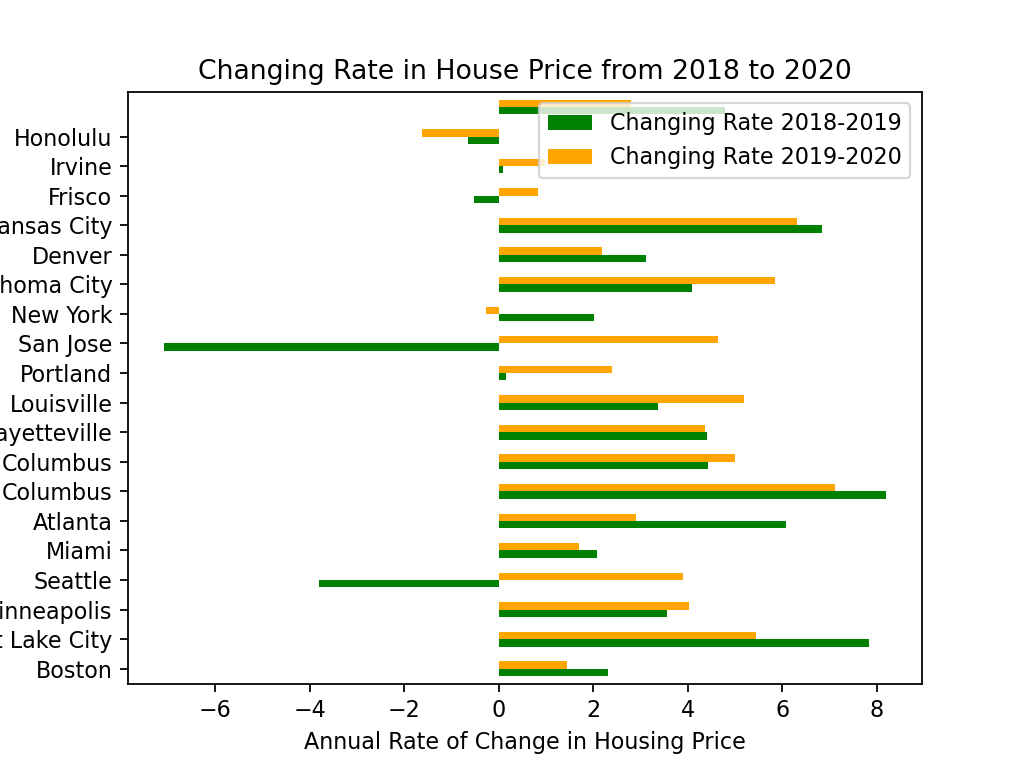

In [25]:
ax = Hrating_df.plot.barh(color=["green","orange"], rot=0)
ax.set_title("Changing Rate in House Price from 2018 to 2020")
ax.set_xlabel("Annual Rate of Change in Housing Price")
ax.set_ylabel("Changing Rate in House Price")
x_axis = np.arange(Hrating_df["City"].nunique())
tick_locations = [value for value in x_axis]
plt.yticks(tick_locations, list(Hrating_df["City"]), rotation='horizontal')
plt.legend(loc = 'best')
plt.savefig('../Output/Changing Rate in House Price from 2018 to 2020.png')
plt.show()